In [604]:
import pandas as pd
import glob
import numpy as np

# 최상위 폴더 경로
root_folder = 'train_abnormal'

# 하위 디렉토리를 포함한 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(f'{root_folder}/**/*.csv', recursive=True)

# 각 파일을 읽어서 DataFrame으로 합치기
dataframes = [pd.read_csv(file,names=['시간','진폭']) for file in csv_files]

# 각 DataFrame에 대해 '진폭' 열에 diff().abs() 적용 후 첫 번째 값을 0으로 설정
dataframes = [
    df.assign(진폭=df['진폭'].diff().abs())
    .fillna({'진폭': 0})  # 첫 번째 NaN 값을 0으로 대체
    for df in dataframes
]

merged_df = pd.concat(dataframes, ignore_index=True)

x_train_abnormal = merged_df
#---------------------------------------------------------------------

# 최상위 폴더 경로
root_folder = 'train_normal'

# 하위 디렉토리를 포함한 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(f'{root_folder}/**/*.csv', recursive=True)

# 각 파일을 읽어서 DataFrame으로 합치기
dataframes = [pd.read_csv(file,names=['시간','진폭']) for file in csv_files]

# 각 DataFrame에 대해 '진폭' 열에 diff().abs() 적용 후 첫 번째 값을 0으로 설정
dataframes = [
    df.assign(진폭=df['진폭'].diff().abs())
    .fillna({'진폭': 0})  # 첫 번째 NaN 값을 0으로 대체
    for df in dataframes
]

merged_df = pd.concat(dataframes, ignore_index=True)

x_train_normal = merged_df
#---------------------------------------------------------------------

# 최상위 폴더 경로
root_folder = 'test_abnormal'

# 하위 디렉토리를 포함한 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(f'{root_folder}/**/*.csv', recursive=True)

# 각 파일을 읽어서 DataFrame으로 합치기
dataframes = [pd.read_csv(file,names=['시간','진폭']) for file in csv_files]

# 각 DataFrame에 대해 '진폭' 열에 diff().abs() 적용 후 첫 번째 값을 0으로 설정
dataframes = [
    df.assign(진폭=df['진폭'].diff().abs())
    .fillna({'진폭': 0})  # 첫 번째 NaN 값을 0으로 대체
    for df in dataframes
]

merged_df = pd.concat(dataframes, ignore_index=True)

x_test_abnormal = merged_df
#---------------------------------------------------------------------

# 최상위 폴더 경로
root_folder = 'test_normal'

# 하위 디렉토리를 포함한 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(f'{root_folder}/**/*.csv', recursive=True)

# 각 파일을 읽어서 DataFrame으로 합치기
dataframes = [pd.read_csv(file,names=['시간','진폭']) for file in csv_files]

# 각 DataFrame에 대해 '진폭' 열에 diff().abs() 적용 후 첫 번째 값을 0으로 설정
dataframes = [
    df.assign(진폭=df['진폭'].diff().abs())
    .fillna({'진폭': 0})  # 첫 번째 NaN 값을 0으로 대체
    for df in dataframes
]

merged_df = pd.concat(dataframes, ignore_index=True)

x_test_normal = merged_df

In [605]:
print(x_train_abnormal.shape)
print(x_train_normal.shape)
print(x_test_abnormal.shape)
print(x_test_normal.shape)
y_train_abnormal = np.zeros(6252)
y_train_normal = np.ones(6232)
y_test_abnormal = np.zeros(2076)
y_test_normal = np.ones(2076)
x_train = pd.concat([x_train_abnormal,x_train_normal])
x_test = pd.concat([x_test_abnormal,x_test_normal])
y_train = np.r_[y_train_abnormal,y_train_normal]
y_test = np.r_[y_test_abnormal,y_test_normal]

del x_train['시간']
del x_test['시간']

print(x_train.shape)

print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


#del merged_df['시간']

(1600512, 2)
(1595392, 2)
(531456, 2)
(531456, 2)
(3195904, 1)
(12484,)
(1062912, 1)
(4152,)


In [606]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3195904 entries, 0 to 1595391
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   진폭      float64
dtypes: float64(1)
memory usage: 48.8 MB


In [607]:
x_train.describe()

,진폭
count,3.195904e+06
mean,1.906230e-01
std,1.704437e-01
min,0.000000e+00
25%,7.676000e-02
50%,1.535300e-01
75%,2.686700e-01
max,1.343380e+00


In [608]:
# 256개씩 묶기
chunk_size = 256
num_chunks = len(x_train) // chunk_size  # 묶음 개수

# 256개씩 평균과 표준편차 계산
means = x_train['진폭'][:num_chunks * chunk_size].values.reshape(-1, chunk_size).mean(axis=1)
stds = x_train['진폭'][:num_chunks * chunk_size].values.reshape(-1, chunk_size).std(axis=1)

# 새로운 DataFrame 생성
x_train = pd.DataFrame({'mean': means, 'std': stds})

# 결과 확인
print(x_train)

           mean       std
0      0.262528  0.200022
1      0.261029  0.194958
2      0.253232  0.188942
3      0.256531  0.198040
4      0.252782  0.189407
...         ...       ...
12479  0.101953  0.075317
12480  0.098955  0.076556
12481  0.101953  0.075317
12482  0.101053  0.078451
12483  0.092807  0.076248

[12484 rows x 2 columns]


In [609]:
# 256개씩 묶기
chunk_size = 256
num_chunks = len(x_test) // chunk_size  # 묶음 개수

# 256개씩 평균과 표준편차 계산
means = x_test['진폭'][:num_chunks * chunk_size].values.reshape(-1, chunk_size).mean(axis=1)
stds = x_test['진폭'][:num_chunks * chunk_size].values.reshape(-1, chunk_size).std(axis=1)
# 새로운 DataFrame 생성
x_test = pd.DataFrame({'mean': means, 'std': stds})

# 결과 확인
print(x_test)

          mean       std
0     0.200457  0.146946
1     0.273323  0.193483
2     0.334345  0.227611
3     0.324750  0.218360
4     0.333595  0.228394
...        ...       ...
4147  0.113947  0.087543
4148  0.115147  0.094688
4149  0.113947  0.087543
4150  0.116047  0.091908
4151  0.117546  0.092131

[4152 rows x 2 columns]


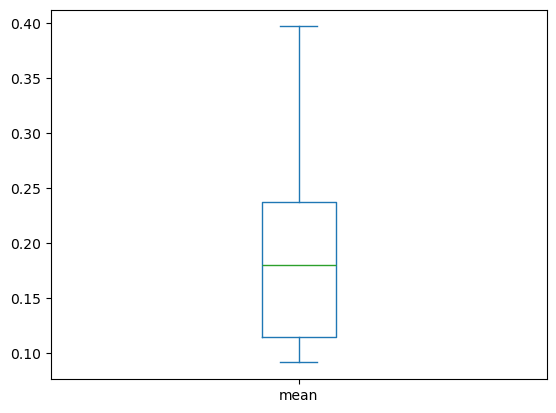

In [610]:
x_train['mean'].plot(kind='box')
plt.show()

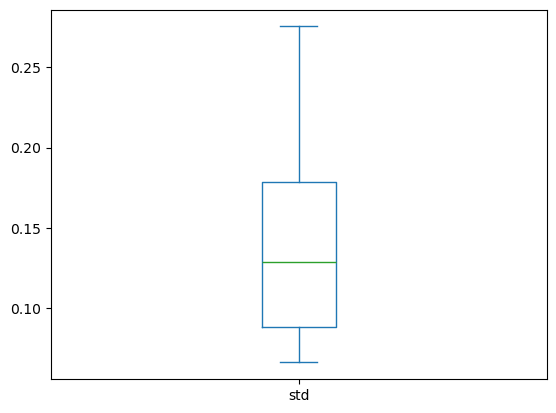

In [611]:
x_train['std'].plot(kind='box')
plt.show()

In [612]:
from sklearn.preprocessing import StandardScaler

#표준화
SS = StandardScaler()

x_train[['mean','std']] = SS.fit_transform(x_train[['mean','std']])
x_test[['mean','std']] = SS.fit_transform(x_test[['mean','std']])

x_train.head()

,mean,std
0,0.870704,1.103402
1,0.852553,1.013081
2,0.758146,0.905779
3,0.798087,1.068062
4,0.752694,0.914076


In [613]:
from sklearn.preprocessing import MinMaxScaler
#정규화
MS = MinMaxScaler()
x_train[['mean','std']] = MS.fit_transform(x_train[['mean','std']])
x_test[['mean','std']] = MS.fit_transform(x_test[['mean','std']])
x_train.head()

,mean,std
0,0.559644,0.639793
1,0.554736,0.615630
2,0.529208,0.586924
3,0.540008,0.630339
4,0.527734,0.589144


-----------------------------------test---------------------------------------------
F1 Score: 0.9997592102094871
Accuracy: 0.9997591522157996
Confusion Matrix:
 [[2075    1]
 [   0 2076]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       1.00      1.00      1.00      2076

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152



C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


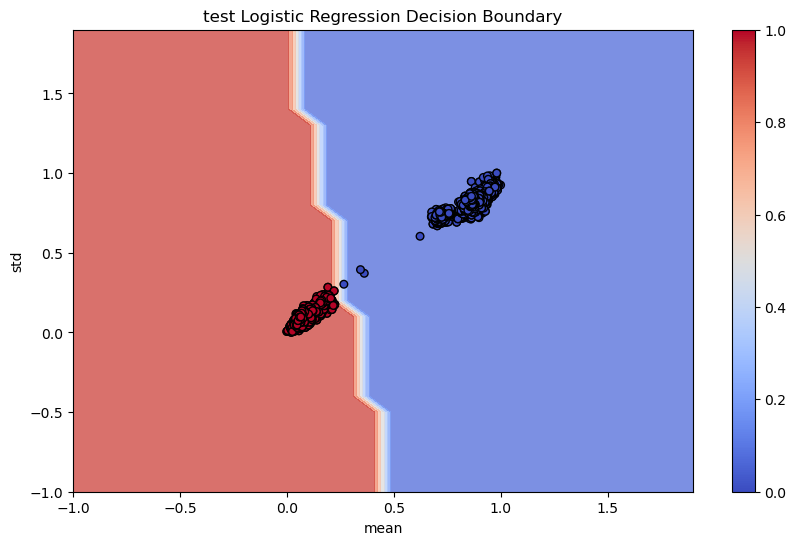

-----------------------------------train---------------------------------------------
F1 Score: 0.9041520515539604
Accuracy: 0.905879525793015
Confusion Matrix:
 [[5767  485]
 [ 690 5542]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      6252
         1.0       0.92      0.89      0.90      6232

    accuracy                           0.91     12484
   macro avg       0.91      0.91      0.91     12484
weighted avg       0.91      0.91      0.91     12484



C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


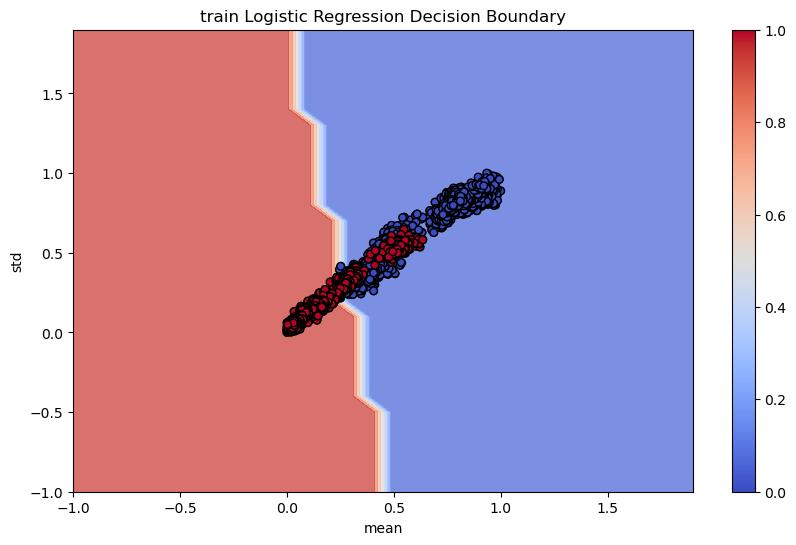

In [614]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 훈련
model.fit(x_train, y_train)

# 예측
test_y_pred = model.predict(x_test)
train_y_pred = model.predict(x_train)

# 모델 평가
print("-----------------------------------test---------------------------------------------")
print("F1 Score:", f1_score(y_test, test_y_pred))
print("Accuracy:", accuracy_score(y_test, test_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_y_pred))
print("Classification Report:\n", classification_report(y_test, test_y_pred))

# 모델의 결정 경계 시각화
# 결정 경계를 그리기 위해 그리드 포인트를 생성
x_min, x_max = x_test['mean'].min() - 1, x_test['std'].max() + 1
y_min, y_max = x_test['mean'].min() - 1, x_test['std'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 모델을 사용하여 그리드의 각 점에 대한 예측을 얻음
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 6))

# 결정 경계를 색으로 표시
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# 훈련 데이터를 산점도로 표시
plt.scatter(x_test['mean'], x_test['std'], c=y_test, edgecolors='k', cmap='coolwarm', s=30)

# 플롯 꾸미기
plt.title('test Logistic Regression Decision Boundary')
plt.xlabel('mean')
plt.ylabel('std')
plt.colorbar()  # 클래스의 색을 보여주는 바 추가
plt.show()

print("-----------------------------------train---------------------------------------------")
print("F1 Score:", f1_score(y_train, train_y_pred))
print("Accuracy:", accuracy_score(y_train, train_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_y_pred))
print("Classification Report:\n", classification_report(y_train, train_y_pred))

# 모델의 결정 경계 시각화
# 결정 경계를 그리기 위해 그리드 포인트를 생성
x_min, x_max = x_train['mean'].min() - 1, x_train['std'].max() + 1
y_min, y_max = x_train['mean'].min() - 1, x_train['std'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 모델을 사용하여 그리드의 각 점에 대한 예측을 얻음
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 6))

# 결정 경계를 색으로 표시
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# 훈련 데이터를 산점도로 표시
plt.scatter(x_train['mean'], x_train['std'], c=y_train, edgecolors='k', cmap='coolwarm', s=30)

# 플롯 꾸미기
plt.title('train Logistic Regression Decision Boundary')
plt.xlabel('mean')
plt.ylabel('std')
plt.colorbar()  # 클래스의 색을 보여주는 바 추가
plt.show()

-----------------------------------test---------------------------------------------
F1 Score: 0.9997592102094871
Accuracy: 0.9997591522157996
Confusion Matrix:
 [[2075    1]
 [   0 2076]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       1.00      1.00      1.00      2076

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152



C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


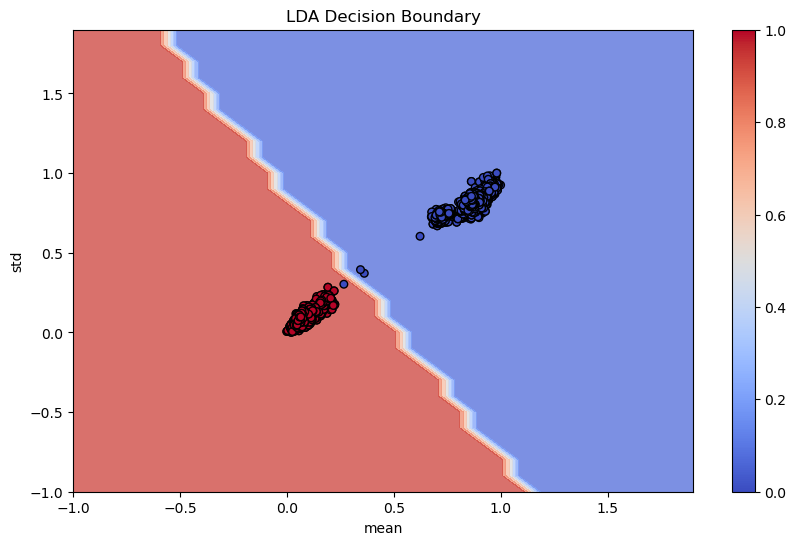

-----------------------------------train---------------------------------------------
F1 Score: 0.873671424233222
Accuracy: 0.8667093880166613
Confusion Matrix:
 [[5066 1186]
 [ 478 5754]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.81      0.86      6252
         1.0       0.83      0.92      0.87      6232

    accuracy                           0.87     12484
   macro avg       0.87      0.87      0.87     12484
weighted avg       0.87      0.87      0.87     12484



C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


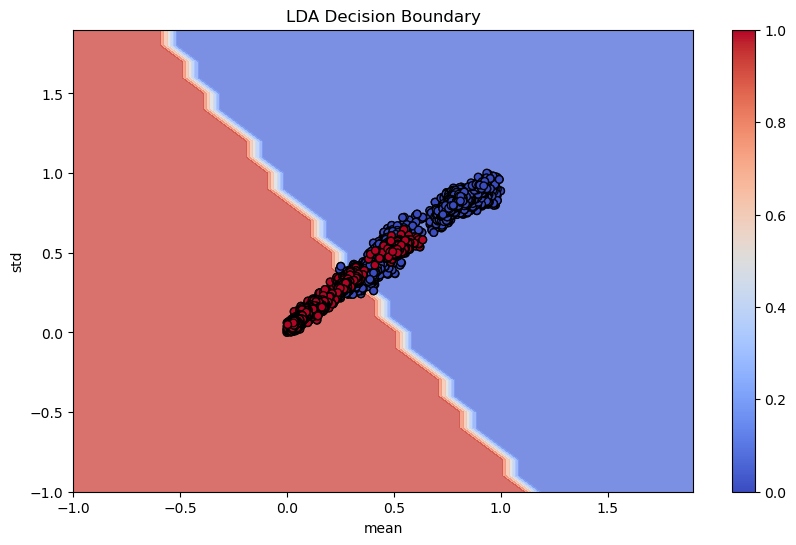

In [615]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA()

# 모델 훈련
model.fit(x_train, y_train)

# 예측
test_y_pred = model.predict(x_test)
train_y_pred = model.predict(x_train)

# 모델 평가
print("-----------------------------------test---------------------------------------------")
print("F1 Score:", f1_score(y_test, test_y_pred))
print("Accuracy:", accuracy_score(y_test, test_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_y_pred))
print("Classification Report:\n", classification_report(y_test, test_y_pred))

# 모델의 결정 경계 시각화
# 결정 경계를 그리기 위해 그리드 포인트를 생성
x_min, x_max = x_test['mean'].min() - 1, x_test['std'].max() + 1
y_min, y_max = x_test['mean'].min() - 1, x_test['std'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 모델을 사용하여 그리드의 각 점에 대한 예측을 얻음
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 6))

# 결정 경계를 색으로 표시
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# 훈련 데이터를 산점도로 표시
plt.scatter(x_test['mean'], x_test['std'], c=y_test, edgecolors='k', cmap='coolwarm', s=30)

# 플롯 꾸미기
plt.title('LDA Decision Boundary')
plt.xlabel('mean')
plt.ylabel('std')
plt.colorbar()  # 클래스의 색을 보여주는 바 추가
plt.show()

print("-----------------------------------train---------------------------------------------")
print("F1 Score:", f1_score(y_train, train_y_pred))
print("Accuracy:", accuracy_score(y_train, train_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_y_pred))
print("Classification Report:\n", classification_report(y_train, train_y_pred))

# 모델의 결정 경계 시각화
# 결정 경계를 그리기 위해 그리드 포인트를 생성
x_min, x_max = x_train['mean'].min() - 1, x_train['std'].max() + 1
y_min, y_max = x_train['mean'].min() - 1, x_train['std'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 모델을 사용하여 그리드의 각 점에 대한 예측을 얻음
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 6))

# 결정 경계를 색으로 표시
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# 훈련 데이터를 산점도로 표시
plt.scatter(x_train['mean'], x_train['std'], c=y_train, edgecolors='k', cmap='coolwarm', s=30)

# 플롯 꾸미기
plt.title('LDA Decision Boundary')
plt.xlabel('mean')
plt.ylabel('std')
plt.colorbar()  # 클래스의 색을 보여주는 바 추가
plt.show()

In [616]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 모델 훈련
rf = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],    # 리프 노드를 위한 최소 샘플 수
    'bootstrap': [True, False]        # 부트스트랩 샘플링 여부
}

# GridSearchCV 적용
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(x_train, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측
test_y_pred = grid_search.best_estimator_.predict(x_test)
train_y_pred = grid_search.best_estimator_.predict(x_train)

# 모델 평가
print("-----------------------------------test---------------------------------------------")
print("F1 Score:", f1_score(y_test, test_y_pred))
print("Accuracy:", accuracy_score(y_test, test_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_y_pred))
print("Classification Report:\n", classification_report(y_test, test_y_pred))
print("-----------------------------------train---------------------------------------------")
print("F1 Score:", f1_score(y_train, train_y_pred))
print("Accuracy:", accuracy_score(y_train, train_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_y_pred))
print("Classification Report:\n", classification_report(y_train, train_y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\user\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
-----------------------------------test---------------------------------------------
F1 Score: 0.9990361445783132
Accuracy: 0.9990366088631984
Confusion Matrix:
 [[2075    1]
 [   3 2073]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       1.00      1.00      1.00      2076

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152

-----------------------------------train---------------------------------------------
F1 Score: 0.9673770491803279
Accuracy: 0.9681191925664852
Confusion Matrix:
 [[6185   67]
 [ 331 5901]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      6252
         

In [617]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# 예측
test_y_pred = model.predict(x_test)
train_y_pred = model.predict(x_train)

# 모델 평가
print("-----------------------------------test---------------------------------------------")
print("F1 Score:", f1_score(y_test, test_y_pred))
print("Accuracy:", accuracy_score(y_test, test_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_y_pred))
print("Classification Report:\n", classification_report(y_test, test_y_pred))
print("-----------------------------------train---------------------------------------------")
print("F1 Score:", f1_score(y_train, train_y_pred))
print("Accuracy:", accuracy_score(y_train, train_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_y_pred))
print("Classification Report:\n", classification_report(y_train, train_y_pred))

-----------------------------------test---------------------------------------------
F1 Score: 0.9990361445783132
Accuracy: 0.9990366088631984
Confusion Matrix:
 [[2075    1]
 [   3 2073]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       1.00      1.00      1.00      2076

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152

-----------------------------------train---------------------------------------------
F1 Score: 0.9999197624969911
Accuracy: 0.99991989746876
Confusion Matrix:
 [[6252    0]
 [   1 6231]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6252
         1.0       1.00      1.00      1.00      6232

    accuracy                           1.00     12484
   macro avg       1.00      1

In [618]:
import xgboost as xgb

xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],    # 트리의 개수
    'max_depth': [3, 6, 10],            # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'subsample': [0.8, 0.9, 1.0],       # 샘플링 비율
    'colsample_bytree': [0.8, 0.9, 1.0] # 트리별 특성 샘플링 비율
}

# GridSearchCV 적용
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(x_train, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측
test_y_pred = grid_search.best_estimator_.predict(x_test)
train_y_pred = grid_search.best_estimator_.predict(x_train)

# 모델 평가
print("-----------------------------------test---------------------------------------------")
print("F1 Score:", f1_score(y_test, test_y_pred))
print("Accuracy:", accuracy_score(y_test, test_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_y_pred))
print("Classification Report:\n", classification_report(y_test, test_y_pred))
print("-----------------------------------train---------------------------------------------")
print("F1 Score:", f1_score(y_train, train_y_pred))
print("Accuracy:", accuracy_score(y_train, train_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_y_pred))
print("Classification Report:\n", classification_report(y_train, train_y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:24:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
-----------------------------------test---------------------------------------------
F1 Score: 0.9975857073877354
Accuracy: 0.9975915221579962
Confusion Matrix:
 [[2076    0]
 [  10 2066]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       1.00      1.00      1.00      2076

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152

-----------------------------------train---------------------------------------------
F1 Score: 0.9240538917017077
Accuracy: 0.9291092598526114
Confusion Matrix:
 [[6215   37]
 [ 848 5384]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      6252
         1